**bold text**# Health Privacy Policy
#Install Transformers

In [ ]:
! pip install transformers

##Install Torch and Tensorflow

In [ ]:
! pip install torch

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

! pip install nvidia-smi

##Import Packages and Classes

In [ ]:
import re
import os
import json
import torch
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive 
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, BertTokenizer, BertForNextSentencePrediction
from transformers import RobertaForSequenceClassification, RobertaTokenizer
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
from transformers import CamembertForSequenceClassification, CamembertTokenizer
from transformers import AlbertForSequenceClassification, AlbertTokenizer
from transformers import OpenAIGPTDoubleHeadsModel, OpenAIGPTTokenizer
from transformers import GPT2Tokenizer, GPT2LMHeadModel

from transformers.optimization import AdamW
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, matthews_corrcoef

##Mount Google Drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Initialize parameters and constants

In [ ]:
# Upload the train file from your local drive
from google.colab import files
uploaded = files.upload()

Saving Health Related Policies 1000 Records.xlsx to Health Related Policies 1000 Records.xlsx


###Read and Prepare Data

##Model Development [BERT]

In [ ]:
#It works - BERT Model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

#It works - Distil BERT
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
#tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

#It works- French Language Model
#model = CamembertForSequenceClassification.from_pretrained('camembert-base')
#tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

#It works - Roberta Tokenizer
#tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
#model = RobertaForSequenceClassification.from_pretrained('roberta-base')

#It works for EPOCHS=30 - Albert Tokenizer
#model = AlbertForSequenceClassification.from_pretrained('albert-base-v2')
#tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

#It does not work
# tokenizer = OpenAIGPTTokenizer.from_pretrained('openai-gpt')
# model = OpenAIGPTDoubleHeadsModel.from_pretrained('openai-gpt')

#It works- GPT2 Tokenizer
#tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
#model = GPT2LMHeadModel.from_pretrained('gpt2')

# tokenizer.add_special_tokens({'cls_token': '[CLS]', 'pad_token': '[PAD]'})
# model.resize_token_embeddings(len(tokenizer))  # Update the model embeddings with the new vocabulary size

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

In [ ]:
uploaded

{'Health Related Policies 1000 Records.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xaa\xf7X\xa4y\x01\x00\x00\x14\x06\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
tokenizer

PreTrainedTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
df = pd.read_excel('/content/Health Related Policies-Labled 1000 Records (1).xlsx')
df.head()

HealthPrivacyPolicy  Label
0  HCF: This Privacy Policy covers the HCF group ...      1
1  central sydney private hospital: Patient Priva...      1
2  St Vincent’s Private Hospital Sydne: Privacy\n...      1
3  The Sydney Private Hospital is committed to pr...      1
4  Privacy Statement for Sydney Local Health Dist...      1

In [ ]:
df.shape

(999, 2)

In [ ]:
X_train = df['HealthPrivacyPolicy'][:700]
y_train = df['Label'][:700]
X_test = df['HealthPrivacyPolicy'][700:]
y_test = df['Label'][700:]
# X_train = df['HealthPrivacyPolicy'][:20]
# y_train = df['Label'][:20]
# X_test = df['HealthPrivacyPolicy'][20:]
# y_test = df['Label'][20:]

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(700,) (700,) (299,) (299,)


###Process Training Data

In [ ]:
input_ids = []
#token_type_ids = []
attention_masks = []

for tweet in X_train:
  #Only for BERT models
  encoded_data = tokenizer.encode_plus(text=tweet, max_length=512, pad_to_max_length=True)
  input_ids.append(encoded_data['input_ids'])

  #ONly FOR OpenAI-GPT and GPT2  
  # encoded_data = tokenizer.encode_plus(text=tweet, max_length=MAX_SEQ_LEN, pad_to_max_length=True)
  # input_ids.append(encoded_data['input_ids'])
      
  #token_type_ids.append(encoded_data['token_type_ids'])
  attention_masks.append(encoded_data['attention_mask'])

# Use train_test_split to split our training data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(
    input_ids, y_train, random_state=27, test_size=0.20)  

#train_token_types, validation_token_types, _, _ = train_test_split(token_type_ids, input_ids,
#                                             random_state=RANDOM_SEED, test_size=0.20)

train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids, random_state=27, test_size=0.20)



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
print(len(train_inputs), len(validation_inputs), train_labels.shape, validation_labels.shape, validation_masks.shape)

AttributeError: ignored

In [ ]:
print(len(train_inputs), len(validation_inputs), len(train_labels), len(validation_labels), len(validation_masks))

560 140 560 140 140


###Convert Data into Tensors

In [ ]:
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

#train_token_types = torch.tensor(train_token_types)
#validation_token_types = torch.tensor(validation_token_types)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

train_labels = torch.tensor(df['Label'][:560].values)
validation_labels = torch.tensor(df['Label'][560:700].values)

###Create Batch

In [ ]:
# Select a batch size for training. 
BATCH_SIZE = 1
batch_size = BATCH_SIZE

# Create an iterator of our data with torch DataLoader 
#train_data = TensorDataset(train_inputs, train_token_types, train_masks, train_labels)
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

#validation_data = TensorDataset(validation_inputs, validation_token_types, validation_masks, validation_labels)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
import torch
torch.cuda.empty_cache()

###Fine-tuning model and validation

####Training the Model

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch 1/20
Train loss: 0.0442
Validation Accuracy: 0.7929

Epoch 2/20
Train loss: 0.0221
Validation Accuracy: 0.8286

Epoch 3/20
Train loss: 0.0145
Validation Accuracy: 0.8357

Epoch 4/20
Train loss: 0.0139
Validation Accuracy: 0.8286

Epoch 5/20
Train loss: 0.0130
Validation Accuracy: 0.8500

Epoch 6/20
Train loss: 0.0124
Validation Accuracy: 0.8286

Epoch 7/20
Train loss: 0.0111
Validation Accuracy: 0.8429

Epoch 8/20
Train loss: 0.0109
Validation Accuracy: 0.8429

Epoch 9/20
Train loss: 0.0109
Validation Accuracy: 0.8500

Epoch 10/20
Train loss: 0.0110
Validation Accuracy: 0.8429

Epoch 11/20
Train loss: 0.0655
Validation Accuracy: 0.8286

Epoch 12/20
Train loss: 0.0598
Validation Accuracy: 0.8143

Epoch 13/20
Train loss: 0.0406
Validation Accuracy: 0.8500

Epoch 14/20
Train loss: 0.0259
Validation Accuracy: 0.7286

Epoch 15/20
Train loss: 0.0152
Validation Accuracy: 0.7857

Epoch 16/20
Train loss: 0.0115
Validation Accuracy: 0.8214

Epoch 17/20
Train loss: 0.0285
Validation Accurac

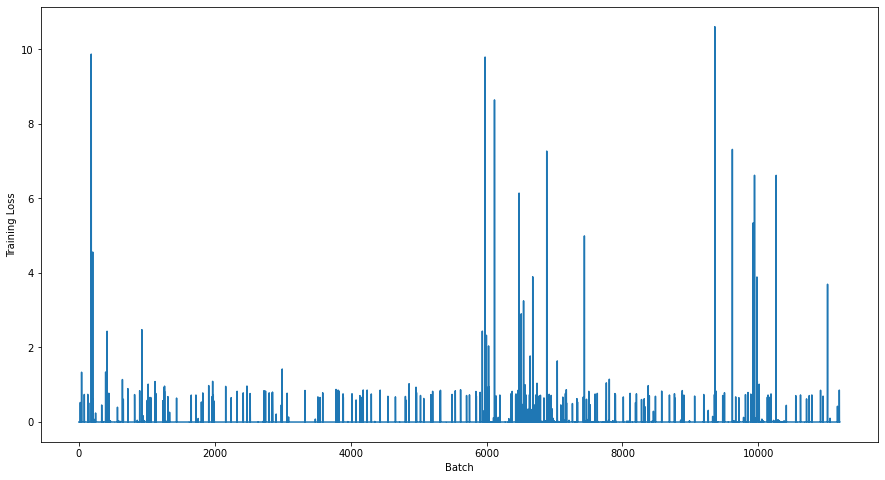

In [ ]:
NUM_EPOCHS = 3
# specify GPU device
#os.environ['CUDA_VISIBLE_DEVICES'] = '1'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = 'cpu'
#print(device)
n_gpu = torch.cuda.device_count()
#print(n_gpu)
torch.cuda.get_device_name(0)


# BERT fine-tuning parameters
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = AdamW(params=optimizer_grouped_parameters, lr=2e-5, weight_decay=0.01)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
  
# Store our loss and accuracy for plotting
train_loss_set = []
# Number of training epochs 
epochs = NUM_EPOCHS

model.cuda()

# BERT training loop
for epoch in range(epochs):  
  print('Epoch {}/{}'.format(epoch+1, epochs))
  
  ## TRAINING
  
  # Set our model to training mode
  model.train()  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    #b_input_ids, b_token_type_ids, b_input_mask, b_labels = batch
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    #loss, _ = model(input_ids = b_input_ids, token_type_ids=b_token_type_ids, attention_mask=b_input_mask, labels=b_labels)
    #loss, _ = model(input_ids = b_input_ids, token_type_ids=b_token_type_ids, attention_mask=b_input_mask, next_sentence_label=b_labels)
    loss, _ = model(input_ids = b_input_ids, attention_mask=b_input_mask, labels=b_labels, return_dict=False)
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1
  print("Train loss: {:.4f}".format(tr_loss/nb_tr_steps))

  ## VALIDATION

  # Put model in evaluation mode
  model.eval()
  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    #b_input_ids, b_token_type_ids, b_input_mask, b_labels = batch
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      #logits = model(b_input_ids, token_type_ids=b_token_type_ids, attention_mask=b_input_mask) 
       logits = model(b_input_ids, attention_mask=b_input_mask)    
    # Move logits and labels to CPU
    logits = np.array(logits[0].cpu())
    label_ids = b_labels.to('cpu').numpy()
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1
  print("Validation Accuracy: {:.4f}\n".format(eval_accuracy/nb_eval_steps))

# plot training performance
plt.figure(figsize=(15,8))
#plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Training Loss")
plt.plot(train_loss_set)
plt.show()

####Evalutaing the Model

In [ ]:
def evaluate(model, test_inputs, token_types, test_masks, test_labels):
  # Convert all of our data into torch tensors, the required datatype for our model
  prediction_inputs = torch.tensor(test_inputs)
  #prediction_token_types = torch.tensor(token_types)
  prediction_masks = torch.tensor(test_masks)
  prediction_labels = torch.tensor(df['Label'][700:].values)

  # Select a batch size for training. 
  batch_size = BATCH_SIZE

  # Create an iterator of our data with torch DataLoader 
  #prediction_data = TensorDataset(prediction_inputs, prediction_token_types, prediction_masks, prediction_labels)
  prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

  ## Prediction on test set
  # Put model in evaluation mode
  model.eval()
  # Tracking variables 
  predictions , true_labels = [], []
  # Predict 
  for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    #b_input_ids, b_token_type_ids, b_input_mask, b_labels = batch
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up prediction
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      # logits = model(b_input_ids, token_type_ids=b_token_type_ids, attention_mask=b_input_mask)
      logits = model(b_input_ids, attention_mask=b_input_mask)
    # Move logits and labels to CPU
    logits = logits[0].cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()  
    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)
    
  # matthews_set = []
  # for i in range(len(true_labels)):
  #   matthews = matthews_corrcoef(true_labels[i],
  #                 np.argmax(predictions[i], axis=1).flatten())
  #   matthews_set.append(matthews)
    
  # Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
  flat_predictions = [item for sublist in predictions for item in sublist]
  flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
  flat_true_labels = [item for sublist in true_labels for item in sublist]

  scores = {
    #'matthews_corrcoef_acc': matthews_corrcoef(flat_true_labels, flat_predictions),
    'precision': precision_score(flat_true_labels, flat_predictions),
    'recall': recall_score(flat_true_labels, flat_predictions),
    'f1_score': f1_score(flat_true_labels, flat_predictions),
    'accuracy': accuracy_score(flat_true_labels, flat_predictions)
  }

  return scores

####Additional codes for printing results

In [ ]:
MAX_SEQ_LEN = 32
input_ids = []
token_type_ids = []
attention_masks = []

for tweet in X_test:
  encoded_data = tokenizer.encode_plus(text=tweet, max_length=MAX_SEQ_LEN, pad_to_max_length=True)
  input_ids.append(encoded_data['input_ids'])
  token_type_ids.append(encoded_data['token_type_ids'])
  attention_masks.append(encoded_data['attention_mask'])

scores = evaluate(model, input_ids, token_type_ids, attention_masks, y_test)
print('{:.4f}, {:.4f}, {:.4f}, {:.4f}'.format(scores['accuracy'], scores['precision'], scores['recall'], scores['f1_score']))

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


0.8997, 0.9276, 0.9676, 0.9472
